# Principal component analysis (PCA)

In [5]:
from sklearn.datasets import load_breast_cancer 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

raw_data = load_breast_cancer()
X= raw_data.data
y= raw_data.target

df = pd.DataFrame(X, columns=raw_data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# PCA 

X_train.shape : (381, 30)
PCA tranformations : (381, 30)


[Text(0.5, 1.0, 'Proportion variance explained elbow plot'),
 Text(0, 0.5, 'PVE'),
 Text(0.5, 0, 'Number of PC')]

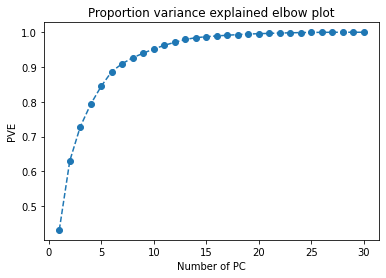

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
print(f"X_train.shape : {X_train.shape}")

pca = PCA(n_components=X.shape[1])
pca_transformations = pca.fit_transform(scaled_X_train)
print(f"PCA tranformations : {pca_transformations.shape}")

proportion_variance_explained = pca.explained_variance_ratio_
pve_cum_sum = np.cumsum(proportion_variance_explained)

fig,ax =  plt.figure(),plt.axes()

ax.plot(range(1,len(pve_cum_sum)+1),pve_cum_sum,"o--")
ax.set(title = "Proportion variance explained elbow plot", 
        ylabel = "PVE", xlabel = "Number of PC")

# Visualization 

[Text(0.5, 1.0, 'First 2 PC that has transformed into '),
 Text(0.5, 0, '1st PC'),
 Text(0, 0.5, '2nd PC')]

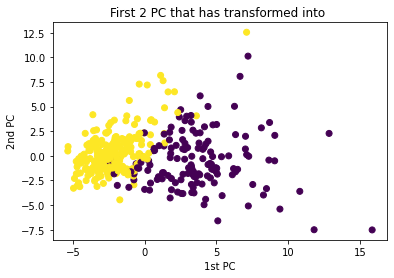

In [24]:
fig,ax = plt.figure(), plt.axes()
ax.scatter(pca_transformations[:,0],pca_transformations[:,1],c=y_train)
ax.set(title = "First 2 PC that has transformed into ", xlabel = "1st PC", ylabel="2nd PC")

In [23]:
proportion_variance_explained[0],proportion_variance_explained[1]

(0.4320343615949975, 0.1985347504582236)

## PCA in a pipeline

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

def evaluate_model(model,title): 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

    cm = confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(title)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



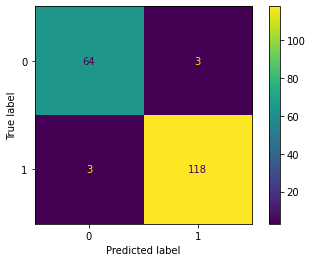

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC 

pipe_with_pca = Pipeline([ 
    ("scaling" , StandardScaler()), 
    ("dimension_reduction", PCA()), 
    ("svm",LinearSVC(max_iter=10000))
])

pipe_no_pca = Pipeline([ 
    ("scaling",StandardScaler()), 
    ("svm",LinearSVC(max_iter=10000))
])

evaluate_model(pipe_no_pca,"Without PCA")

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



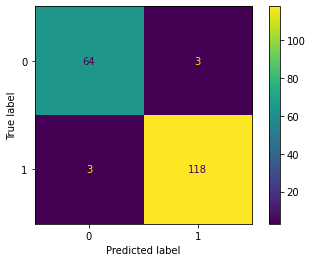

In [31]:
evaluate_model(pipe_with_pca,"With PCA")